##  General Visualisation

The general visualisation is to represent the overview of the **BRANDS** offered by the website

In [1]:
import numpy as np
import pandas as pd
import re
import bs4
import requests
import seaborn as sns
import requests
import urllib.request
from urllib.request import urlopen
import time
import matplotlib.pyplot as plt
%matplotlib inline
print('All imports done!!!!')

All imports done!!!!


In [2]:
df = pd.read_csv("E:\datscience\data/Main_data.csv")
df.head()

Brand      Model             Color    OS_Version  RAM  ROM ProcessorType  \
0   Redmi       9i          Sea Blue    Android 10      4   64        Octa     
1    Oppo      A53    Electric Black    Android 10      6  128        Quad     
2    Lava  Z61 PRO    Champagne Gold       Android 9    2   16        Octa     
3  Yureka   Yu5012         Champagne       Android 9    3   16        Quad     
4   Redmi       9A             Black    Android 10      2   32        Octa     

  Processing_speed FrontCamera          RearCamera            Battery  \
0          2 GHz        8 MP               13 MP    Lithium Polymer     
1        1.6 GHz       16 MP    13MP + 2MP + 2MP        Lithium Ion     
2        1.6 GHz        5 MP                8 MP    Lithium Polymer     
3        1.3 GHz        5 MP               13 MP        Lithium Ion     
4          2 GHz        5 MP               13 MP    Lithium Polymer     

   Batterypower ()     SIM SIMType Display_Resolution  Screensize  Weight  \
0             6000  Dual    Nano       1544*720(HD)           6.5   350.0   
1             5000  Dual    Nano       1544*720(HD)           6.5   186.0   
2             3100  Dual    Nano       1544*720(HD)           5.4   160.0   
3             2500  Dual    Nano      1280x720 (HD)           5.0   159.0   
4             5000  Dual    Nano       1544*720(HD)           6.5   194.0   

   Original Price  Discounted Price  
0          9999.0            8999.0  
1         17990.0           15490.0  
2          6499.0            5899.0  
3          7999.0            6899.0  
4          8499.0            7399.0

In [3]:
df.tail(10)

Brand              Model               Color     OS_Version  RAM  ROM  \
162      Oppo              A52      Twilight Black     Android 10      6  128   
163      Oppo              A53      Electric Black     Android 10      4   64   
164      Oppo              A53          Fancy Blue     Android 10      6  128   
165      Oppo              F17      Dynamic Orange     Android 10      8  128   
166      Oppo              F15       Unicorn White        Android 9    4  128   
167      Oppo              F15    Lightening Black        Android 9    4  128   
168  Micromax  Yu Yutopia 5050            Graphite    Android 5.0.1    4   32   
169      Oppo              F17      Classic Silver     Android 10      6  128   
170      Oppo              F17           Navy Blue     Android 10      6  128   
171      Oppo              F17      Dynamic Orange     Android 10      6  128   

    ProcessorType Processing_speed FrontCamera          RearCamera  \
162        Octa            3 GHz       16 MP          12+8+2+2MP     
163        Quad          1.6 GHz       16 MP    13MP + 2MP + 2MP     
164        Quad          1.6 GHz       16 MP    13MP + 2MP + 2MP     
165        Quad            2 GHz       16 MP        16MP+8MP+2MP     
166        Octa          2.1 GHz       16 MP        48M+8M+2M+2M     
167        Octa          2.1 GHz       16 MP        48M+8M+2M+2M     
168        Octa            2 GHz        8 MP               21 MP     
169        Quad            2 GHz       16 MP        16MP+8MP+2MP     
170        Quad            2 GHz       16 MP        16MP+8MP+2MP     
171        Quad            2 GHz       16 MP        16MP+8MP+2MP     

               Battery  Batterypower ()            SIM       SIMType  \
162  Lithium Polymer               5000         Dual          Nano     
163      Lithium Ion               5000         Dual          Nano     
164      Lithium Ion               5000         Dual          Nano     
165      Lithium Ion               4015         Dual          Nano     
166  Lithium Polymer               4000  Hybrid Dual          Nano     
167  Lithium Polymer               4000  Hybrid Dual          Nano     
168      Lithium Ion               3000         Dual    Micro,Nano     
169      Lithium Ion               4015         Dual          Nano     
170      Lithium Ion               4015         Dual          Nano     
171      Lithium Ion               4015         Dual          Nano     

       Display_Resolution  Screensize  Weight  Original Price  \
162    2400x1080 (FHD+)           6.5   192.0         19990.0   
163        1544*720(HD)           6.5   186.0         15990.0   
164        1544*720(HD)           6.5   186.0         17990.0   
165  2400 x 1080 (FHD+)           6.4   163.0         22990.0   
166    2400x1080 (FHD+)           6.4   172.0         20990.0   
167    2400x1080 (FHD+)           6.4   172.0         20990.0   
168  2400 x 1080 (FHD+)           5.2   159.0         19999.0   
169  2400 x 1080 (FHD+)           6.4   163.0         20990.0   
170  2400 x 1080 (FHD+)           6.4   163.0         20990.0   
171  2400 x 1080 (FHD+)           6.4   163.0         20990.0   

     Discounted Price  
162           16990.0  
163           12990.0  
164           15490.0  
165           18490.0  
166           15990.0  
167           15990.0  
168            6999.0  
169           16990.0  
170           16990.0  
171           16990.0

In [4]:
df.shape

(172, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               172 non-null    object 
 1   Model               172 non-null    object 
 2   Color               172 non-null    object 
 3   OS_Version          172 non-null    object 
 4   RAM                 172 non-null    int64  
 5   ROM                 172 non-null    int64  
 6   ProcessorType       172 non-null    object 
 7   Processing_speed    172 non-null    object 
 8   FrontCamera         172 non-null    object 
 9   RearCamera          172 non-null    object 
 10  Battery             172 non-null    object 
 11  Batterypower ()     172 non-null    int64  
 12  SIM                 172 non-null    object 
 13  SIMType             172 non-null    object 
 14  Display_Resolution  172 non-null    object 
 15  Screensize          172 non-null    float64
 16  Weight  

In [6]:
df['Discounted Price']= pd.to_numeric(df['Discounted Price'])


In [7]:
Brands = df.Brand.unique()
Brands

array(['Redmi', 'Oppo', 'Lava', 'Yureka', 'INFINIX', 'itel', 'Lenovo',
       'Billon', 'Poco', 'TECNO', 'Samsung', 'Nokia', 'Realme',
       'Motorola', 'Panasonic', 'Blackberry', 'Xolo', 'VOTO', 'Huawei',
       'OnePlus', 'Micromax', 'Apple', 'Intex', 'Xiaomi', 'Swipe'],
      dtype=object)

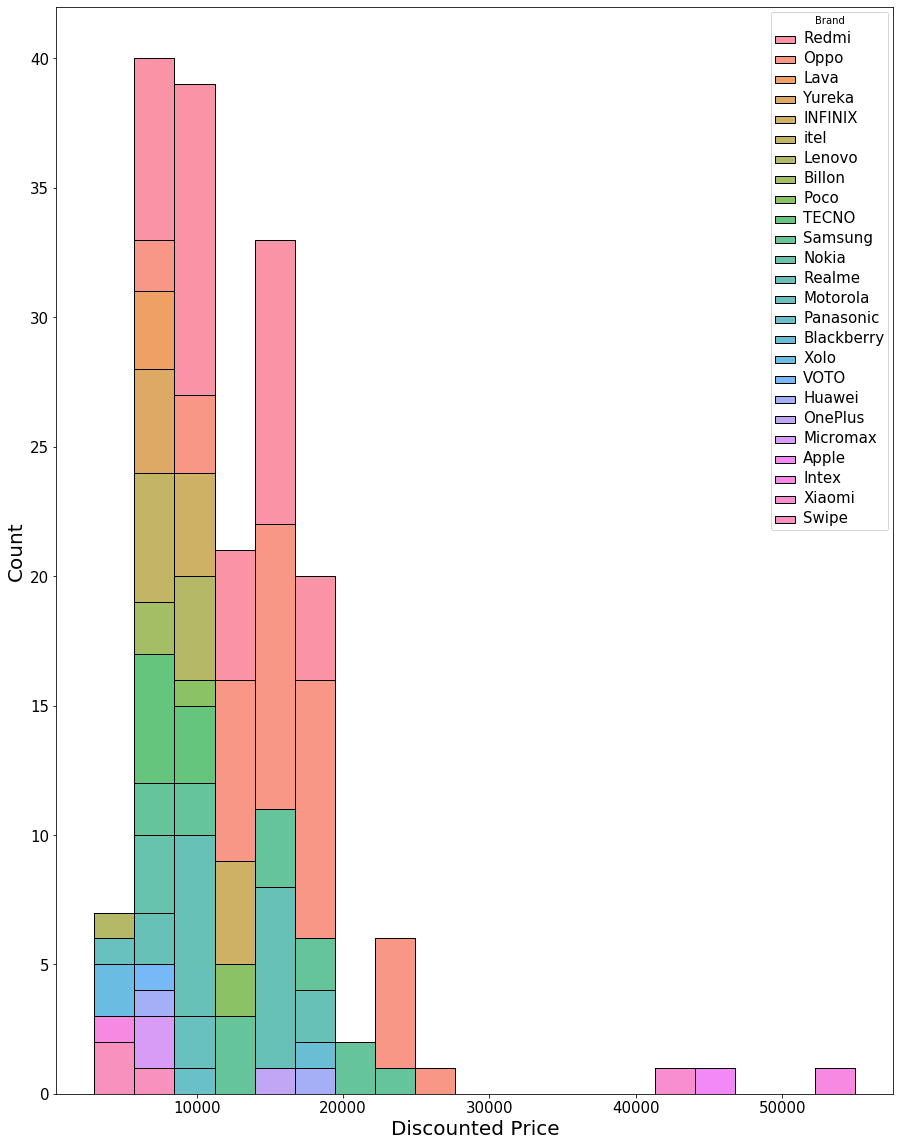

In [8]:
fig,ax = plt.subplots(figsize = (15,20))
b = sns.histplot(data = df, x="Discounted Price", hue="Brand", multiple = 'stack', legend = True, ax = ax)
b.set_xlabel("Discounted Price",fontsize=20)
b.set_ylabel("Count",fontsize=20)
b.tick_params(labelsize = 15)
plt.setp(ax.get_legend().get_texts(), fontsize='15') 
plt.show()

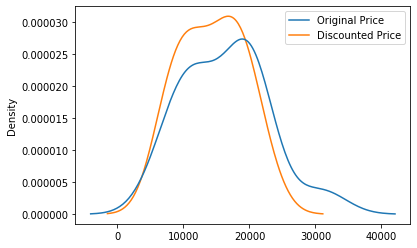

In [9]:
a = sns.kdeplot(data = [df[df['Brand']== 'Samsung']['Original Price'], df[df['Brand']== 'Samsung']['Discounted Price']])

In [11]:
df[df['Brand']== 'Samsung']['Original Price']

19     12999.0
26     12999.0
34      7000.0
36     17999.0
51      8999.0
59     12999.0
62     19999.0
71     19999.0
94      9999.0
97      9999.0
112    19999.0
113    20999.0
114    19999.0
115    30999.0
122    19999.0
Name: Original Price, dtype: float64

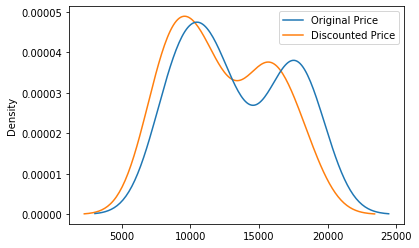

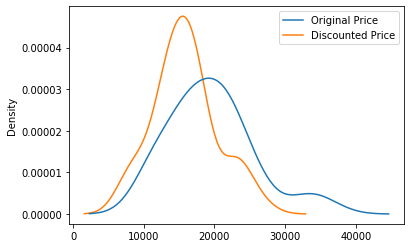

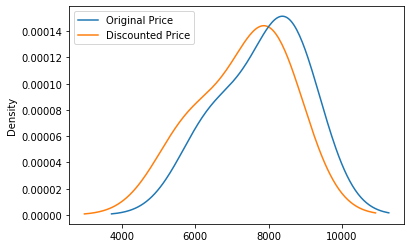

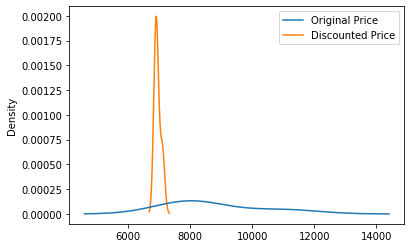

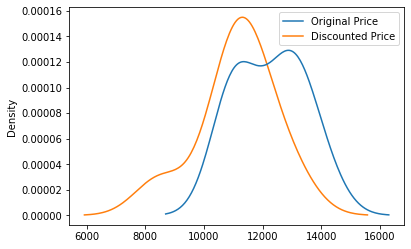

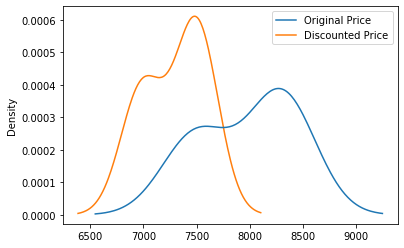

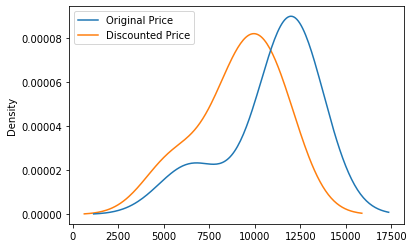

C:\Users\sunai\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


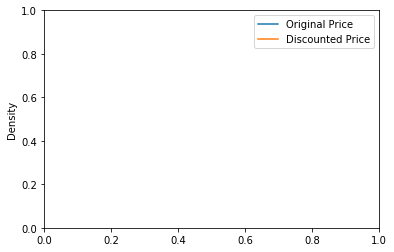

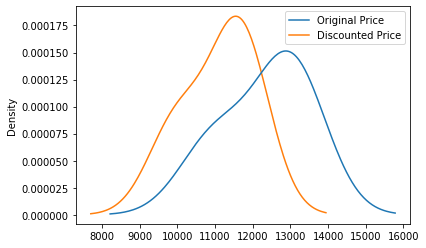

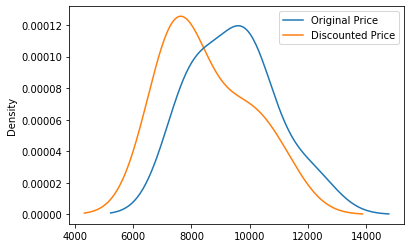

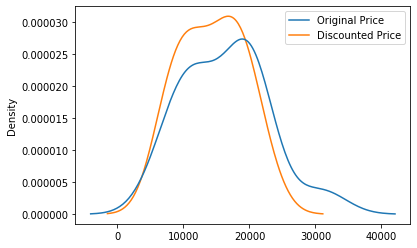

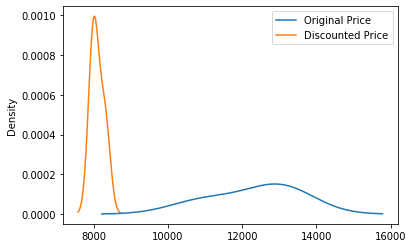

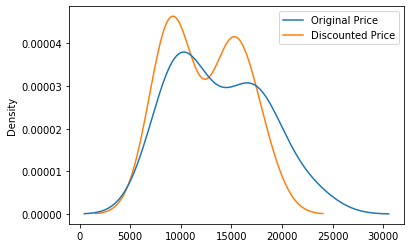

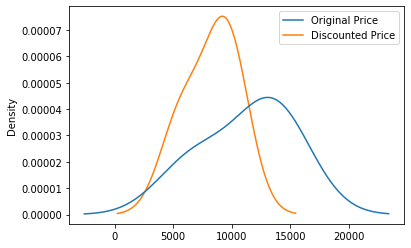

KeyError: 0

In [12]:
for k in Brands:
    sns.kdeplot(data = [df[df['Brand']== k]['Original Price'], df[df['Brand']== k]['Discounted Price']])
    plt.show()

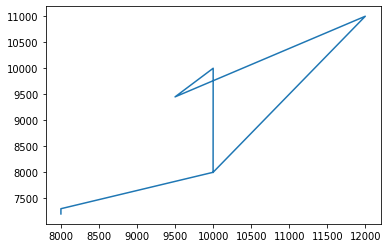

In [13]:
plt.plot(df[df['Brand']== 'TECNO']['Original Price'], df[df['Brand']== 'TECNO']['Discounted Price'])

In [17]:
Brands_New = ['Redmi', 'Oppo', 'Lava', 'Yureka', 'INFINIX', 'itel', 'Lenovo', 'Poco', 'TECNO', 'Samsung', 'Nokia', 'Realme',
       'Motorola', 'Huawei', 'Micromax', 'Intex', 'Swipe']

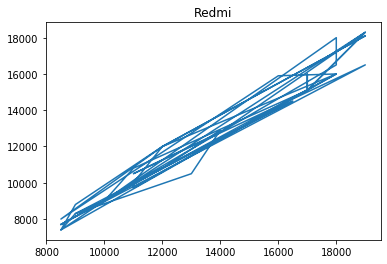

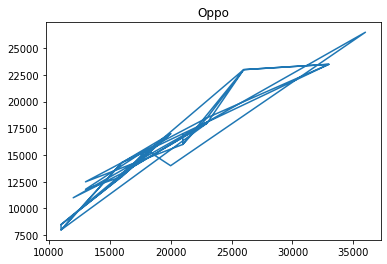

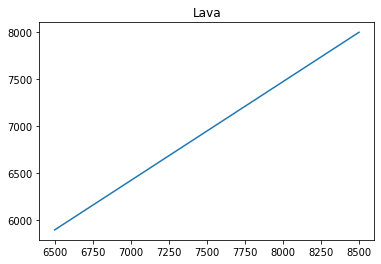

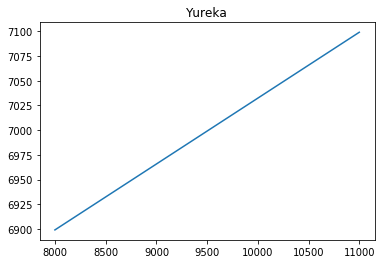

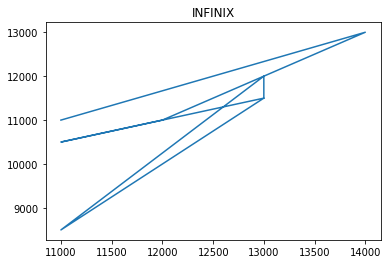

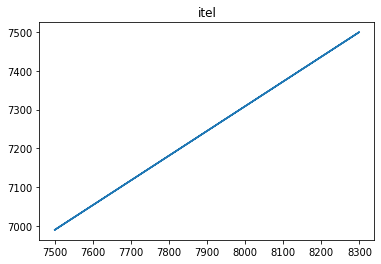

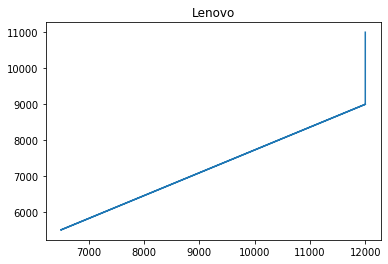

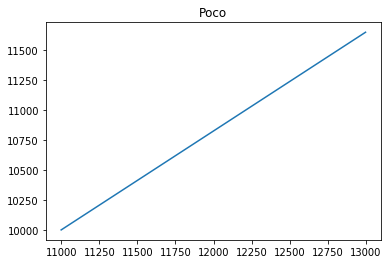

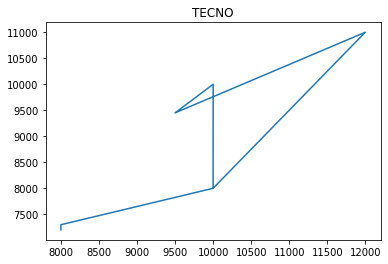

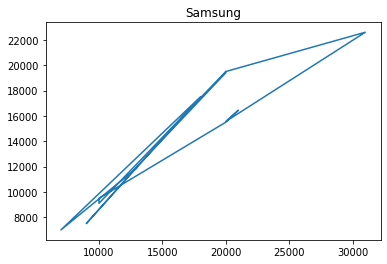

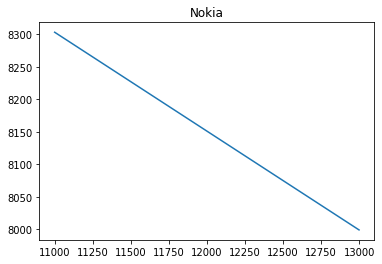

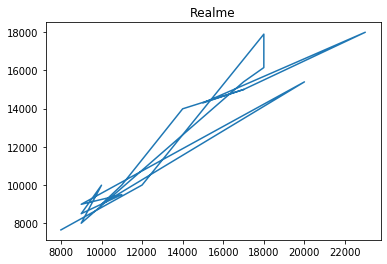

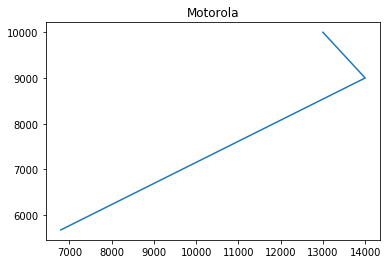

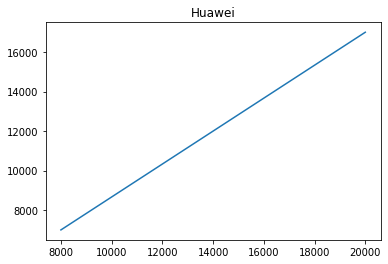

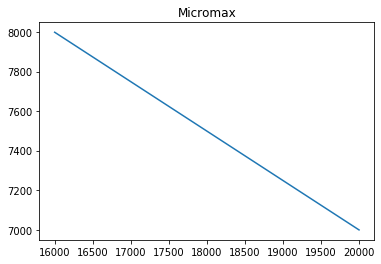

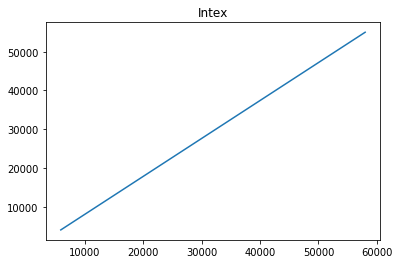

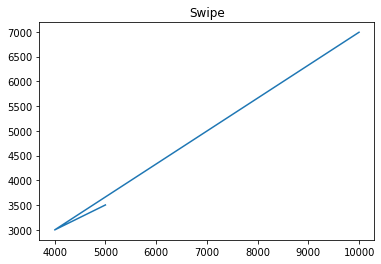

In [18]:
for k in Brands_New:
    plt.plot(df[df['Brand']== k]['Original Price'], df[df['Brand']== k]['Discounted Price'])
    plt.title(k)
    plt.show()
    


In [94]:
# ! pip install plotly==4.14.1

  Attempting uninstall: plotly
    Found existing installation: plotly 4.12.0
    Uninstalling plotly-4.12.0:
      Successfully uninstalled plotly-4.12.0


In [19]:
import plotly.express as px
fig = px.scatter_3d(df, x='RAM', y='ROM', z='Discounted Price', color ='Brand', opacity=0.7)
fig.show()